In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [68]:
df = pd.read_csv('estadisticas_fantasy.csv')
print(df)

     Unnamed: 0          Nombre  ... Penaltis Parados Goles en Propia Puerta
0             0     Lewandowski  ...                0                      0
1             1        Raphinha  ...                0                      0
2             2    Lamine Yamal  ...                0                      0
3             3    Vinícius Jr.  ...                0                      0
4             4          Mbappe  ...                0                      0
..          ...             ...  ...              ...                    ...
585         585         Vallejo  ...                0                      0
586         586          Adrián  ...                0                      0
587         587  Rodrigo Abajas  ...                0                      0
588         588     Juan Carlos  ...                0                      0
589         589        R Chasco  ...                0                      0

[590 rows x 31 columns]


In [69]:
### EDA ###

In [70]:
print("num_atributs: ", len(df.keys()))
nan_columns = df.columns[df.isna().sum()>0].tolist()
print("NaNs: ", nan_columns)
print("num nans", df.isna().sum().sum())
print("Describe\n", df.describe())
print("\n\ninfo:\n", df.info())
print("\n\nnunique:\n", df.nunique())

num_atributs:  31
NaNs:  []
num nans 0
Describe
        Unnamed: 0      Puntos  ...  Penaltis Parados  Goles en Propia Puerta
count  590.000000  590.000000  ...        590.000000              590.000000
mean   294.500000   27.794915  ...          0.013559                0.028814
std    170.462606   25.861069  ...          0.129591                0.167424
min      0.000000   -3.000000  ...          0.000000                0.000000
25%    147.250000    7.250000  ...          0.000000                0.000000
50%    294.500000   21.000000  ...          0.000000                0.000000
75%    441.750000   46.000000  ...          0.000000                0.000000
max    589.000000  146.000000  ...          2.000000                1.000000

[8 rows x 26 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0         

In [71]:
df.rename(columns={'Unnamed: 0': 'ID_jugador'}, inplace=True)

df['Precio Actual'] = df['Precio Actual'].str.replace('.','')
df['Precio Inicial'] = df['Precio Inicial'].str.replace('.','')

df = df[df['Posición'] != 'DT']
df.drop(columns=['Nombre'], inplace=True)
df.drop(columns=['ID_jugador'], inplace=True)

le = LabelEncoder()
df['Posición'] = le.fit_transform(df['Posición'])
df['Equipo'] = le.fit_transform(df['Equipo'])


In [72]:
### CORRELATIONS ###

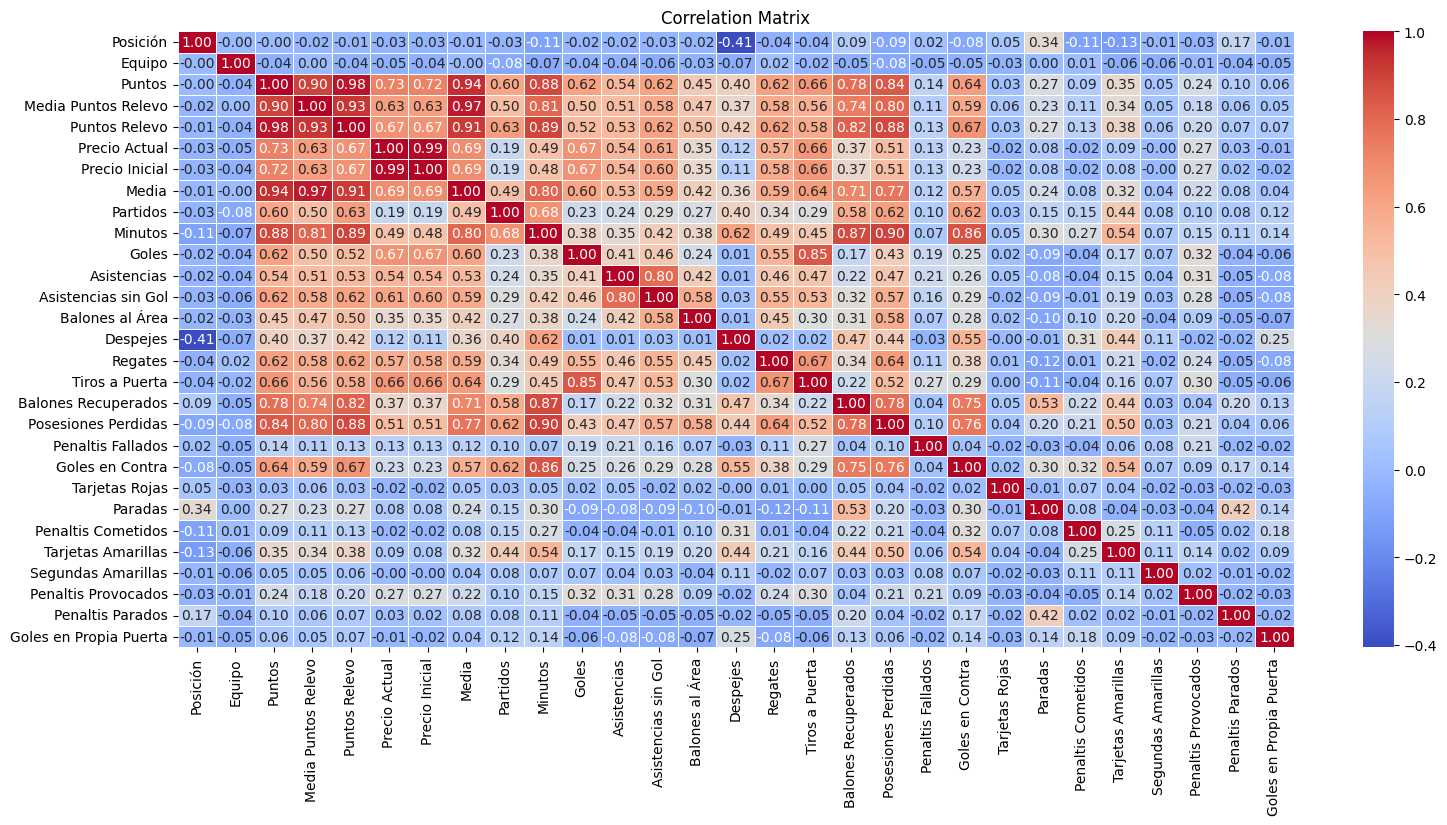

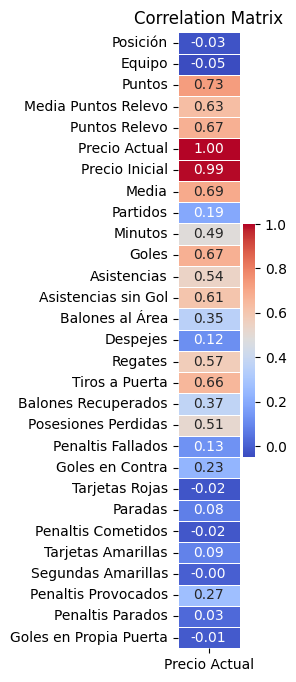

In [73]:
corr_matrix = df.corr()
corr_preu_actual = corr_matrix[['Precio Actual']]

plt.figure(figsize=(18, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')

plt.figure(figsize=(1,8))
sns.heatmap(corr_preu_actual, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [74]:
target_att = 'Precio Actual'
attributes = [k for k in df.keys() if k!= target_att]
X = df[attributes].to_numpy()
y = df[[target_att]].to_numpy()


X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [75]:
lr = LinearRegression()
lr.fit(X,y)

y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

r2_test = r2_score(y_test,y_pred)
r2_train = r2_score(y_train,y_pred_train)
print (r2_train,r2_test)


0.9967964947567648 0.9698033210097005


In [76]:
import numpy as np
print(lr.coef_,lr.intercept_)
for i in range(len(attributes)):
  print (attributes[i],lr.coef_[0][i])

[[-5.91509724e+03  3.06490918e+03  4.70111142e+04  1.01589262e+06
  -1.43598545e+05  9.68413550e-01 -5.31018214e+05 -1.85175904e+04
   1.69320489e+03  4.12747783e+05  2.89384543e+05  4.78705238e+04
  -4.67862068e+03 -8.47227824e+03 -6.65986944e+04 -5.37029588e+04
   2.07861675e+04  5.87494289e+03  3.32734195e+04 -1.04104431e+05
  -2.03679203e+05 -2.76619066e+04 -7.13349409e+04 -5.71004097e+04
   4.31841023e+03 -2.16867417e+04  6.02892200e+05  1.26720299e+06]] [146046.79429847]
Posición -5915.09723892793
Equipo 3064.909179564366
Puntos 47011.11418192675
Media Puntos Relevo 1015892.6213771427
Puntos Relevo -143598.54478255313
Precio Inicial 0.9684135499111473
Media -531018.2140918667
Partidos -18517.590391075715
Minutos 1693.2048946945804
Goles 412747.7834316772
Asistencias 289384.54254007846
Asistencias sin Gol 47870.523761450095
Balones al Área -4678.620676363641
Despejes -8472.278244657959
Regates -66598.6943554748
Tiros a Puerta -53702.95883936277
Balones Recuperados 20786.1675171194

(452, 1)
(452, 1)


TypeError: unhashable type: 'numpy.ndarray'

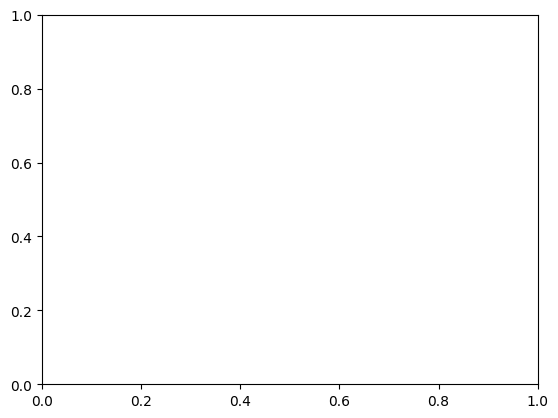

In [77]:
y_train = np.array(y_train)
print(y_train.shape)
print(y_pred_train.shape)

plt.scatter(y_train,y_pred_train)
plt.plot(y_train,y_train,'--',c = 'red')
plt.xlabel('y_real')
plt.ylabel('y_pred')
plt.show()
"""
#print(y__pred_train)
plt.scatter(y_train,y_pred_train-y_train)
plt.xlabel('y_real')
plt.ylabel('error')
plt.show()

plt.scatter(y_train,abs(y_pred_train-y_train))
plt.xlabel('y_real')
plt.ylabel('MAE')
plt.show()


plt.scatter(y_train,abs(y_pred_train-y_train)/y_train)
plt.xlabel('y_real')
plt.ylabel('MAPE')
plt.show()
"""